In [58]:
import os
import sys
import json
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec
import time

In [59]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
''''''
''''''

def cm2pr_binary(cm):
    p = cm[0,0]/np.sum(cm[:,0])
    r = cm[0,0]/np.sum(cm[0])
    return (p, r)

''''''
''''''
def PR(tp, fp, fn):
    P = float(tp)/(tp + fp)
    R = float(tp)/(tp + fn)
    return (P, R)

In [3]:
###### Import model
model = Word2Vec.load('testmodel')


In [4]:
###### Import ref without effect
ref = json.load(open('./Desktop/thesis/standard_ref_without_effect.json'))
entity = open('./Desktop/thesis/entity_replaced.csv').read().split('\n')[:-1]

In [5]:
###### Entity dict 
entity_dict = {}
for row in entity :
    entity_dict[row.split('\t')[1]] = row.split('\t')[0]

In [6]:
###### Ref pair drug - herb
drug_herb_dict = {}
for herb in ref :
    for drug in ref[herb] :
        try :
            if entity_dict[drug] not in drug_herb_dict :
                drug_herb_dict[entity_dict[drug]] = [entity_dict[herb]]
            else :
                drug_herb_dict[entity_dict[drug]].append(entity_dict[herb])
        except :
            pass

In [34]:
###### Ref pair herb - drug 
herb_drug_dict = {}
for herb in ref :
    for drug in ref[herb] :
        try :
            if entity_dict[herb] not in herb_drug_dict :
                herb_drug_dict[entity_dict[herb]] = [entity_dict[drug]]
            else :
                herb_drug_dict[entity_dict[herb]].append(entity_dict[drug])
        except :
            pass

In [211]:
###### Testing by herb
predict = []
true = []
classes_name = []
success = 0
fail = 0
for herb in herb_drug_dict :
    top = model.wv.similar_by_word(herb,topn=5000)
    top_drug = []
    for each in top :
        if each[0][:11] == 'drug_entity' :
            top_drug.append(each[0])
    for drug in herb_drug_dict[herb] :
        classes_name.append(drug)
        for each in top_drug :
            if each == drug :
                predict.append(each)
                true.append(drug)
                classes_name.append(each)
                success+=1
                break
            elif each != drug and each in drug_herb_dict :
                predict.append(each)
                true.append(drug)
                classes_name.append(each)
                fail+=1


classes_name = list(set(classes_name)) 

In [212]:
len(predict)

27

In [213]:
len(true)

27

In [240]:
###### Testing by drug
predict = []
true = []
classes_name = []
success = 0
fail = 0
for drug in drug_herb_dict :
    top_100 = model.wv.similar_by_word(drug,topn=1000)
    top_herb = []
    for each in top_100 :
        if each[0][:11] == 'herb_entity' :
            top_herb.append(each)
    for herb in drug_herb_dict[drug] :
        #classes_name.append(herb)
        for each in top_herb :
            if each[0] == herb :
                predict.append(each[0])
                true.append(herb)
                classes_name.append(herb)
                success+=1
                break
            elif each[0] != herb and each[0] in herb_drug_dict :
                if each[1] > 0.9 :
                    predict.append(each[0])
                    true.append(herb)
                    classes_name.append(each[0])
                    classes_name.append(herb)
                    fail+=1


classes_name = list(set(classes_name))

errors = []

for each in predict :
    if each not in true :
        errors.append(each)
for error in errors :
    ind = predict.index(error)
    predict.pop(ind)
    true.pop(ind)
    

#true = np.array(true)
#predict = np.array(predict)
            

In [245]:
true = np.array(true)
predict = np.array(predict)

In [228]:
print(success)
print(fail)
print(len(predict))

10
115
114


In [242]:
errors = []
for each in predict :
    if each not in true :
        errors.append(each)


In [243]:
errors

[]

In [209]:
true = np.array(['c','b','b','c'])
predict = np.array(['a','b','b','c'])

Confusion matrix, without normalization
[[1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 2 0 0 0]
 [1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0]
 [1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0]
 [1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0]
 [1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0]
 [1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0]
 [0 0 0 1 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0]
 [1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0]
 [0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
 [0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0

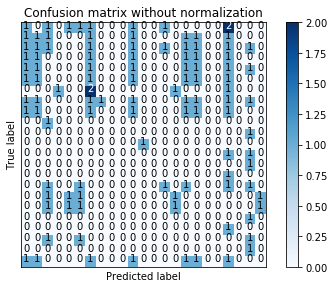

In [246]:
###### Confusion Matrix
cnf_matrix = confusion_matrix(true,predict)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, [] , normalize= False ,title='Confusion matrix without normalization')
plt.show()

In [247]:
###### Accuracy score
print('accuracy = ',accuracy_score(true,predict))

accuracy =  0.0943396226415


In [248]:
###### Calculate Precision and Recall for each class
Precision_list = []
Recall_list = []
Total_TP = 0
Total_FP = 0
Total_FN = 0

for i in range(len(cnf_matrix[0])) :
    ######
    buf_tp = 0
    buf_fp = 0
    buf_fn = 0
    ######
    Total_TP+= cnf_matrix[i][i]
    buf_tp = cnf_matrix[i][i]
    ######
    Total_FP+= (sum(cnf_matrix[i]) - cnf_matrix[i][i])
    buf_fp = (sum(cnf_matrix[i]) - cnf_matrix[i][i])
    ######
    for each in cnf_matrix :
        Total_FN+= each[i]
        buf_fn+= each[i]
    ######
    Total_FN-= cnf_matrix[i][i]
    buf_fn-= cnf_matrix[i][i]
    ######
    (P, R) = PR(buf_tp, buf_fp, buf_fn)
    Precision_list.append(P)
    Recall_list.append(R)
######
micro_ap = float(Total_TP)/(Total_TP + Total_FP)
micro_ar = float(Total_TP)/(Total_TP + Total_FN)

######
macro_ap = (sum(Precision_list))/ len(Precision_list)
macro_ar = (sum(Recall_list))/ len(Recall_list)

######
print(micro_ap)
print(micro_ar)
print(macro_ap)
print(macro_ar)
######

###### F1-score
F_score = (2*micro_ap*micro_ar)/(micro_ap+micro_ar) 

print(F_score)

0.0943396226415
0.0943396226415
0.174516908213
nan
0.0943396226415


In [250]:
Recall_list

[0.1111111111111111,
 0.125,
 0.125,
 0.0,
 0.0,
 0.0,
 0.18181818181818182,
 1.0,
 nan,
 nan,
 0.0,
 1.0,
 nan,
 0.0,
 0.0,
 0.1111111111111111,
 0.0,
 nan,
 nan,
 0.066666666666666666,
 nan,
 0.10000000000000001,
 0.0]

In [144]:
buf_tp = 0
buf_fp = 0
buf_fn = 0

buf_tp = cnf_matrix[10][10]
buf_fp = (sum(cnf_matrix[10]) - cnf_matrix[10][10])

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0])

In [191]:
sum(cnf_matrix[10])

8

In [57]:
###### Precision and Recall

p,r = cm2pr_binary(cnf_matrix)
print("precition = {0:.2f}, recall = {1:.2f}".format(p, r))

precition = 0.67, recall = 0.50


In [64]:
###### F1-score
F_score = (2*p*r)/(p+r) 

print(F_score)


0.571428571429


In [65]:
cm = np.array([[100., 10], [20, 70]])

In [66]:
cm

array([[ 100.,   10.],
       [  20.,   70.]])